# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [452]:
str ="17 campaigns"

In [453]:
import os
os.makedirs("data/bank-additional", exist_ok=True)

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [455]:
# Assuming the data file is named 'bank-additional-full.csv' and located in a directory named 'data/bank-additional'
try:
    df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
    df = df.copy()
    print("Successfully read data from data/vehicles.csv")

    #Rename Columns to be easier
    df.columns = [c.strip().lower().replace('.', '_') for c in df.columns]
    print("First 10 rows of the DataFrame:")
    df.head(10)
except FileNotFoundError:
    print("Error: data/vehicles.csv not found. Make sure the file path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")



df.head(10)

Successfully read data from data/vehicles.csv
First 10 rows of the DataFrame:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.
                                                                                                    

```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [456]:
# data exploration
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx 

In [457]:
print("\nDataFrame shape:")
print(df.shape)
print("\nDataFrame Description:")
df.describe()



DataFrame shape:
(41188, 21)

DataFrame Description:


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [458]:
# Check data types of each column
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                  object
dtype: object


# **What's  missing  vs needs coercion**
### **Missing values (nan/implicit)**
* `pdays`: 999 means “not previously contacted.” That's a sentinel for missing recency.

 - Do: create prev_contacted = (pdays != 999) and replace 999 → NaN in a cleaned pdays column.

* `unknown` levels in several categoricals (job, marital, education, default, housing, loan):
 - Do: keep as their own category

### **Columns to coerce to numeric**
* Client/contact counts & durations: `age`, `duration`, `campaign`, `pdays`,

* Note on duration: keep numeric for analysis but exclude from production models (data leakage).

### **Columns to coerce to categorical (one-hot encoding)**
job, marital, education, default, housing, loan, contact, poutcome, month, day_of_week

Make `month` and `day_of_week` ordered categoricals:


```
month order: ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

day_of_week order: ['mon','tue','wed','thu','fri']
```

### **Target to coerce to binary numeric**
y: map 'yes'→1, 'no'→0 .

In [459]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
# Sentinel to missing (pdays=999 means "not contacted")
df['prev_contacted'] = (df['pdays'] != 999).map({True: "yes", False: "no"}).astype("object")
df.drop(columns=["pdays"], inplace=True)

#Drop Duration for preventing leakage
df.drop(columns=["duration"], inplace=True)

# remove - and . from jobs
df['job'] = df['job'].str.replace(r'[-.]', '', regex=True)


Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [476]:
df = df.drop_duplicates()

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp_var_rate    41188 non-null  float64
 14  cons_price_idx  41188 non-null  float64
 15  cons_conf_idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr_employed     41188 non-null 

In [461]:
# explore data uniqe values
print(df.select_dtypes('object').agg('nunique'))

job               12
marital            4
education          8
default            3
housing            3
loan               3
contact            2
month             10
day_of_week        5
poutcome           3
y                  2
prev_contacted     2
dtype: int64


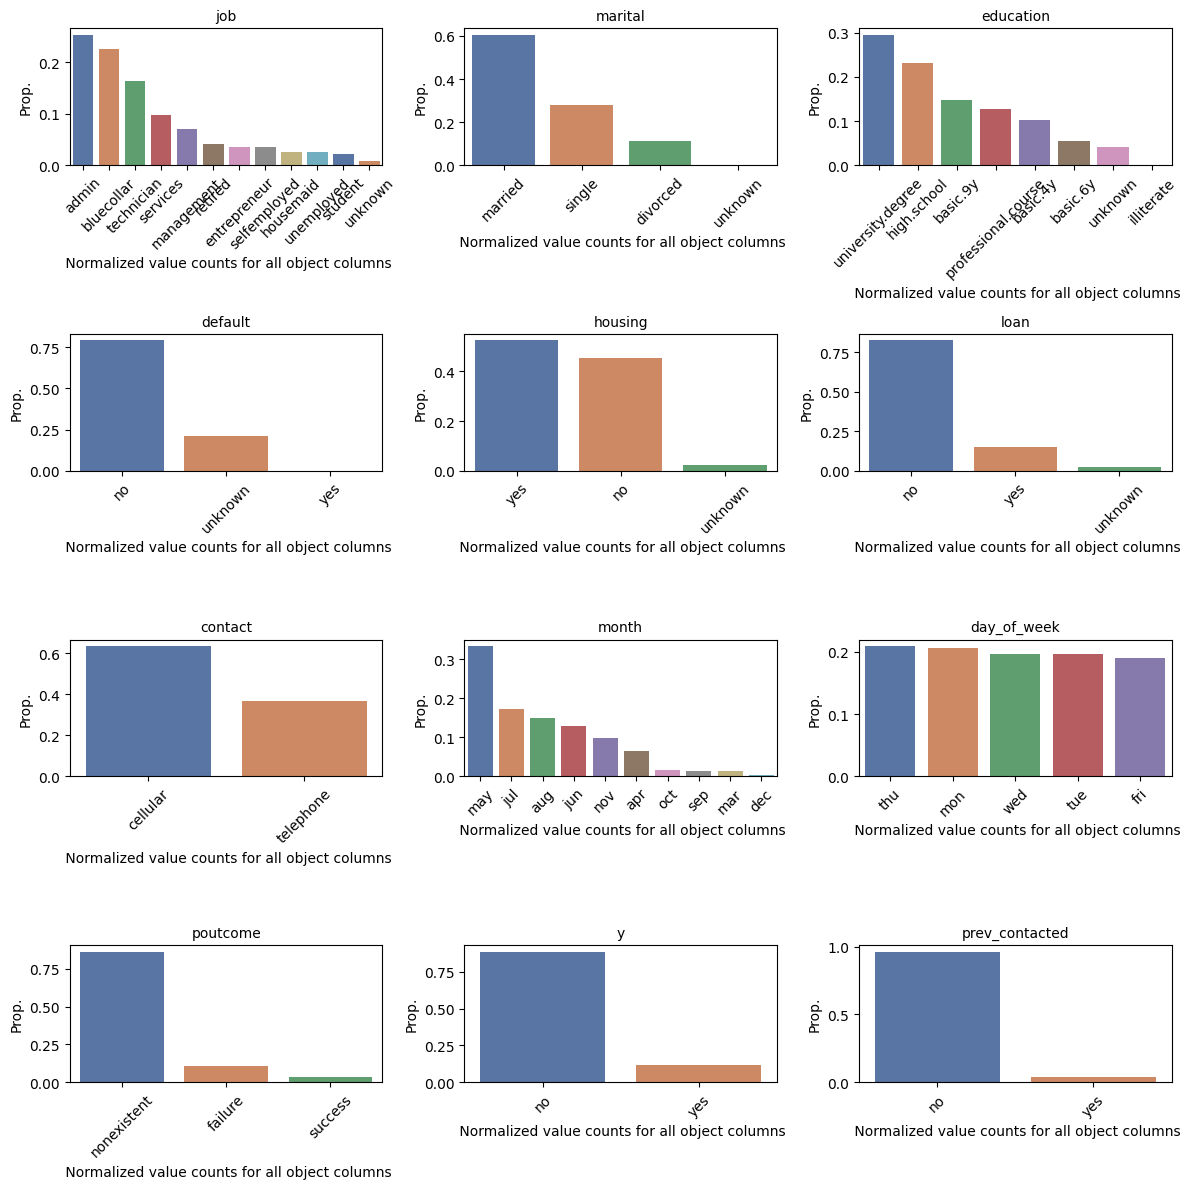

In [462]:
#EDA – Univariate Analysis for Categorial features
import math
def plot_normalized_bars_all(df, top_n=None, palette="deep"):
    """
    Plots normalized value counts for all object columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
        palette (str, optional): Seaborn color palette.
    """
    obj_cols = df.select_dtypes(include=['object']).columns
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(obj_cols) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, obj_cols):
        proportions = df[col].value_counts(normalize=True, dropna=False).round(4).sort_values(ascending=False)
        if top_n:
          proportions = proportions.head(top_n)

        sns.barplot(
            x=proportions.index,
            y=proportions.values,
            order=proportions.index,
            palette=palette,
            ax=ax,
            hue=proportions.index ,
            legend=False
        )

        ax.set_title(col, fontsize=10)
        ax.set_xlabel(" Normalized value counts for all object columns")
        ax.set_ylabel("Prop.")
        ax.tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for ax in axes[len(obj_cols):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()
plot_normalized_bars_all(df)

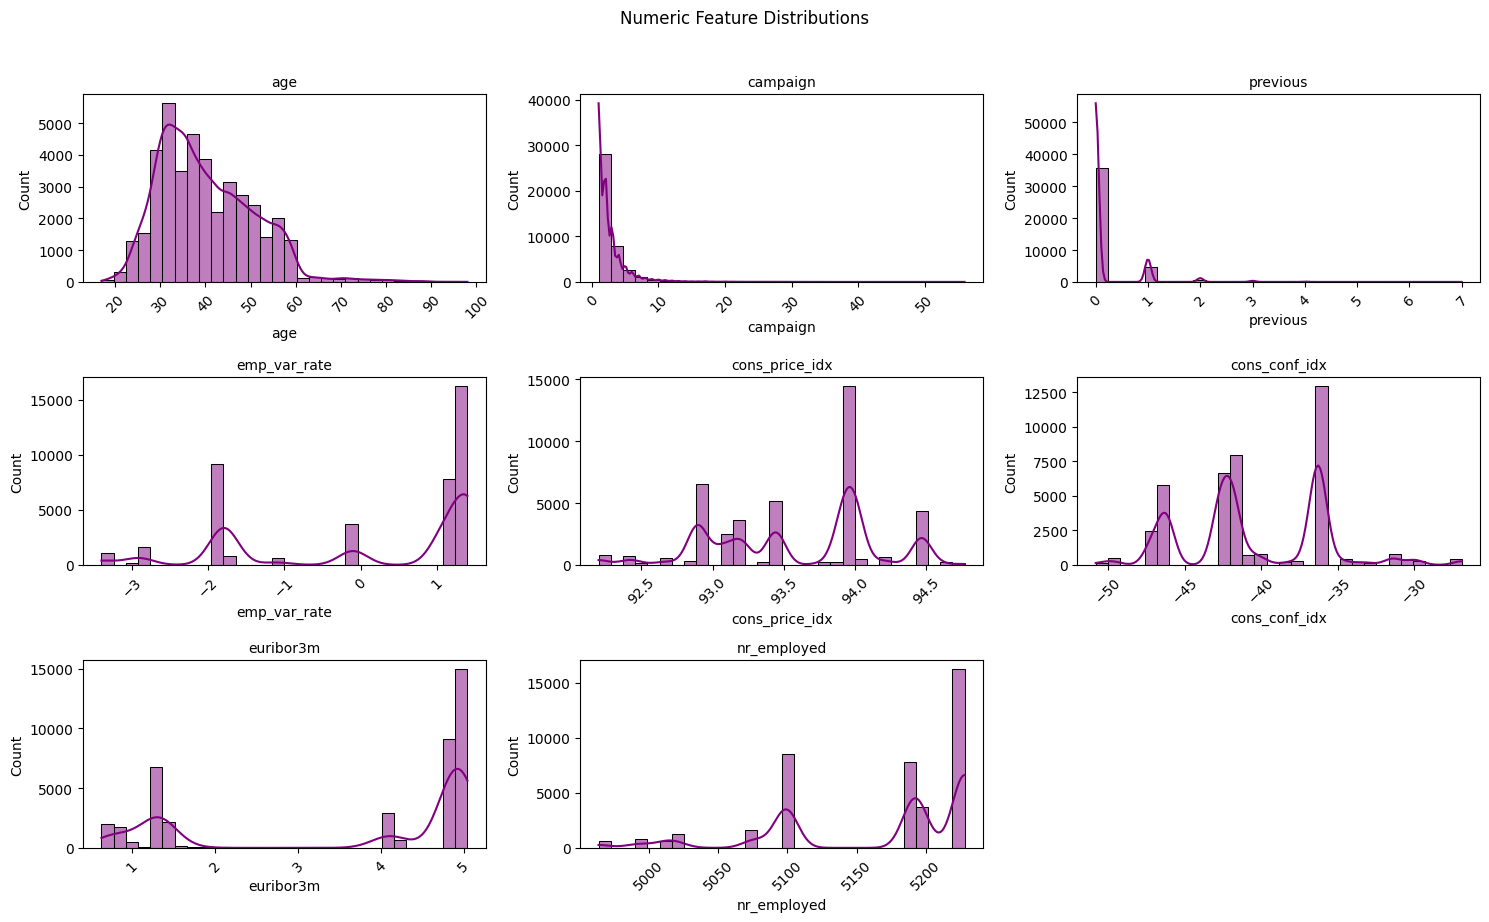

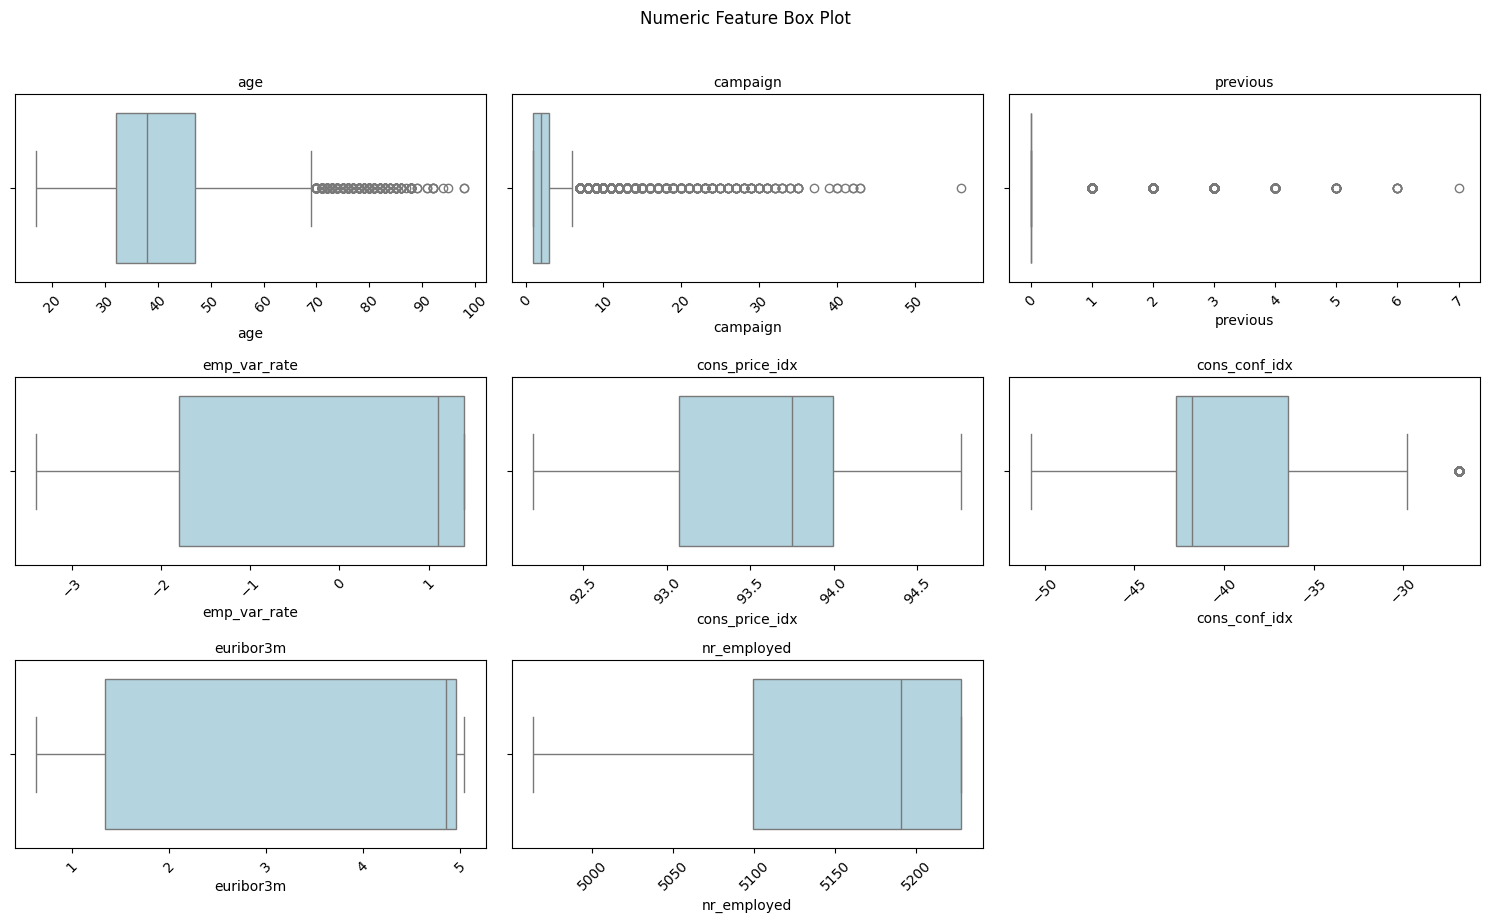

In [463]:
#EDA – Univariate Analysis for numerical features
def plot_normalized_Histo_all(df, top_n=None ,bins=30, palette="deep"):
    """
    Histogram and Box plot for all numerical columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
    """
    obj_cols = df.select_dtypes(include=['number']).columns
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(obj_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, obj_cols):
        sns.histplot(df[col], kde=True,ax=ax, bins=bins,color='purple')
        ax.set_title(col, fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for ax in axes[len(obj_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature Distributions", y=1.02)
    plt.tight_layout()
    plt.show()

def plot_normalized_box_all(df, top_n=None,palette = "deep"):
    """
    Histogram and Box plot for all numerical columns in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
        top_n (int, optional): Show only the top N categories.
        palette (str, optional): Seaborn color palette.
    """
    obj_cols = df.select_dtypes(include=['number']).columns
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(obj_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, obj_cols):
        # Box plot
        sns.boxplot(x=df[col],ax=ax,color='lightblue')
        ax.set_title(col, fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for ax in axes[len(obj_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature Box Plot", y=1.02)
    plt.tight_layout()
    plt.show()

plot_normalized_Histo_all(df)
plot_normalized_box_all(df)

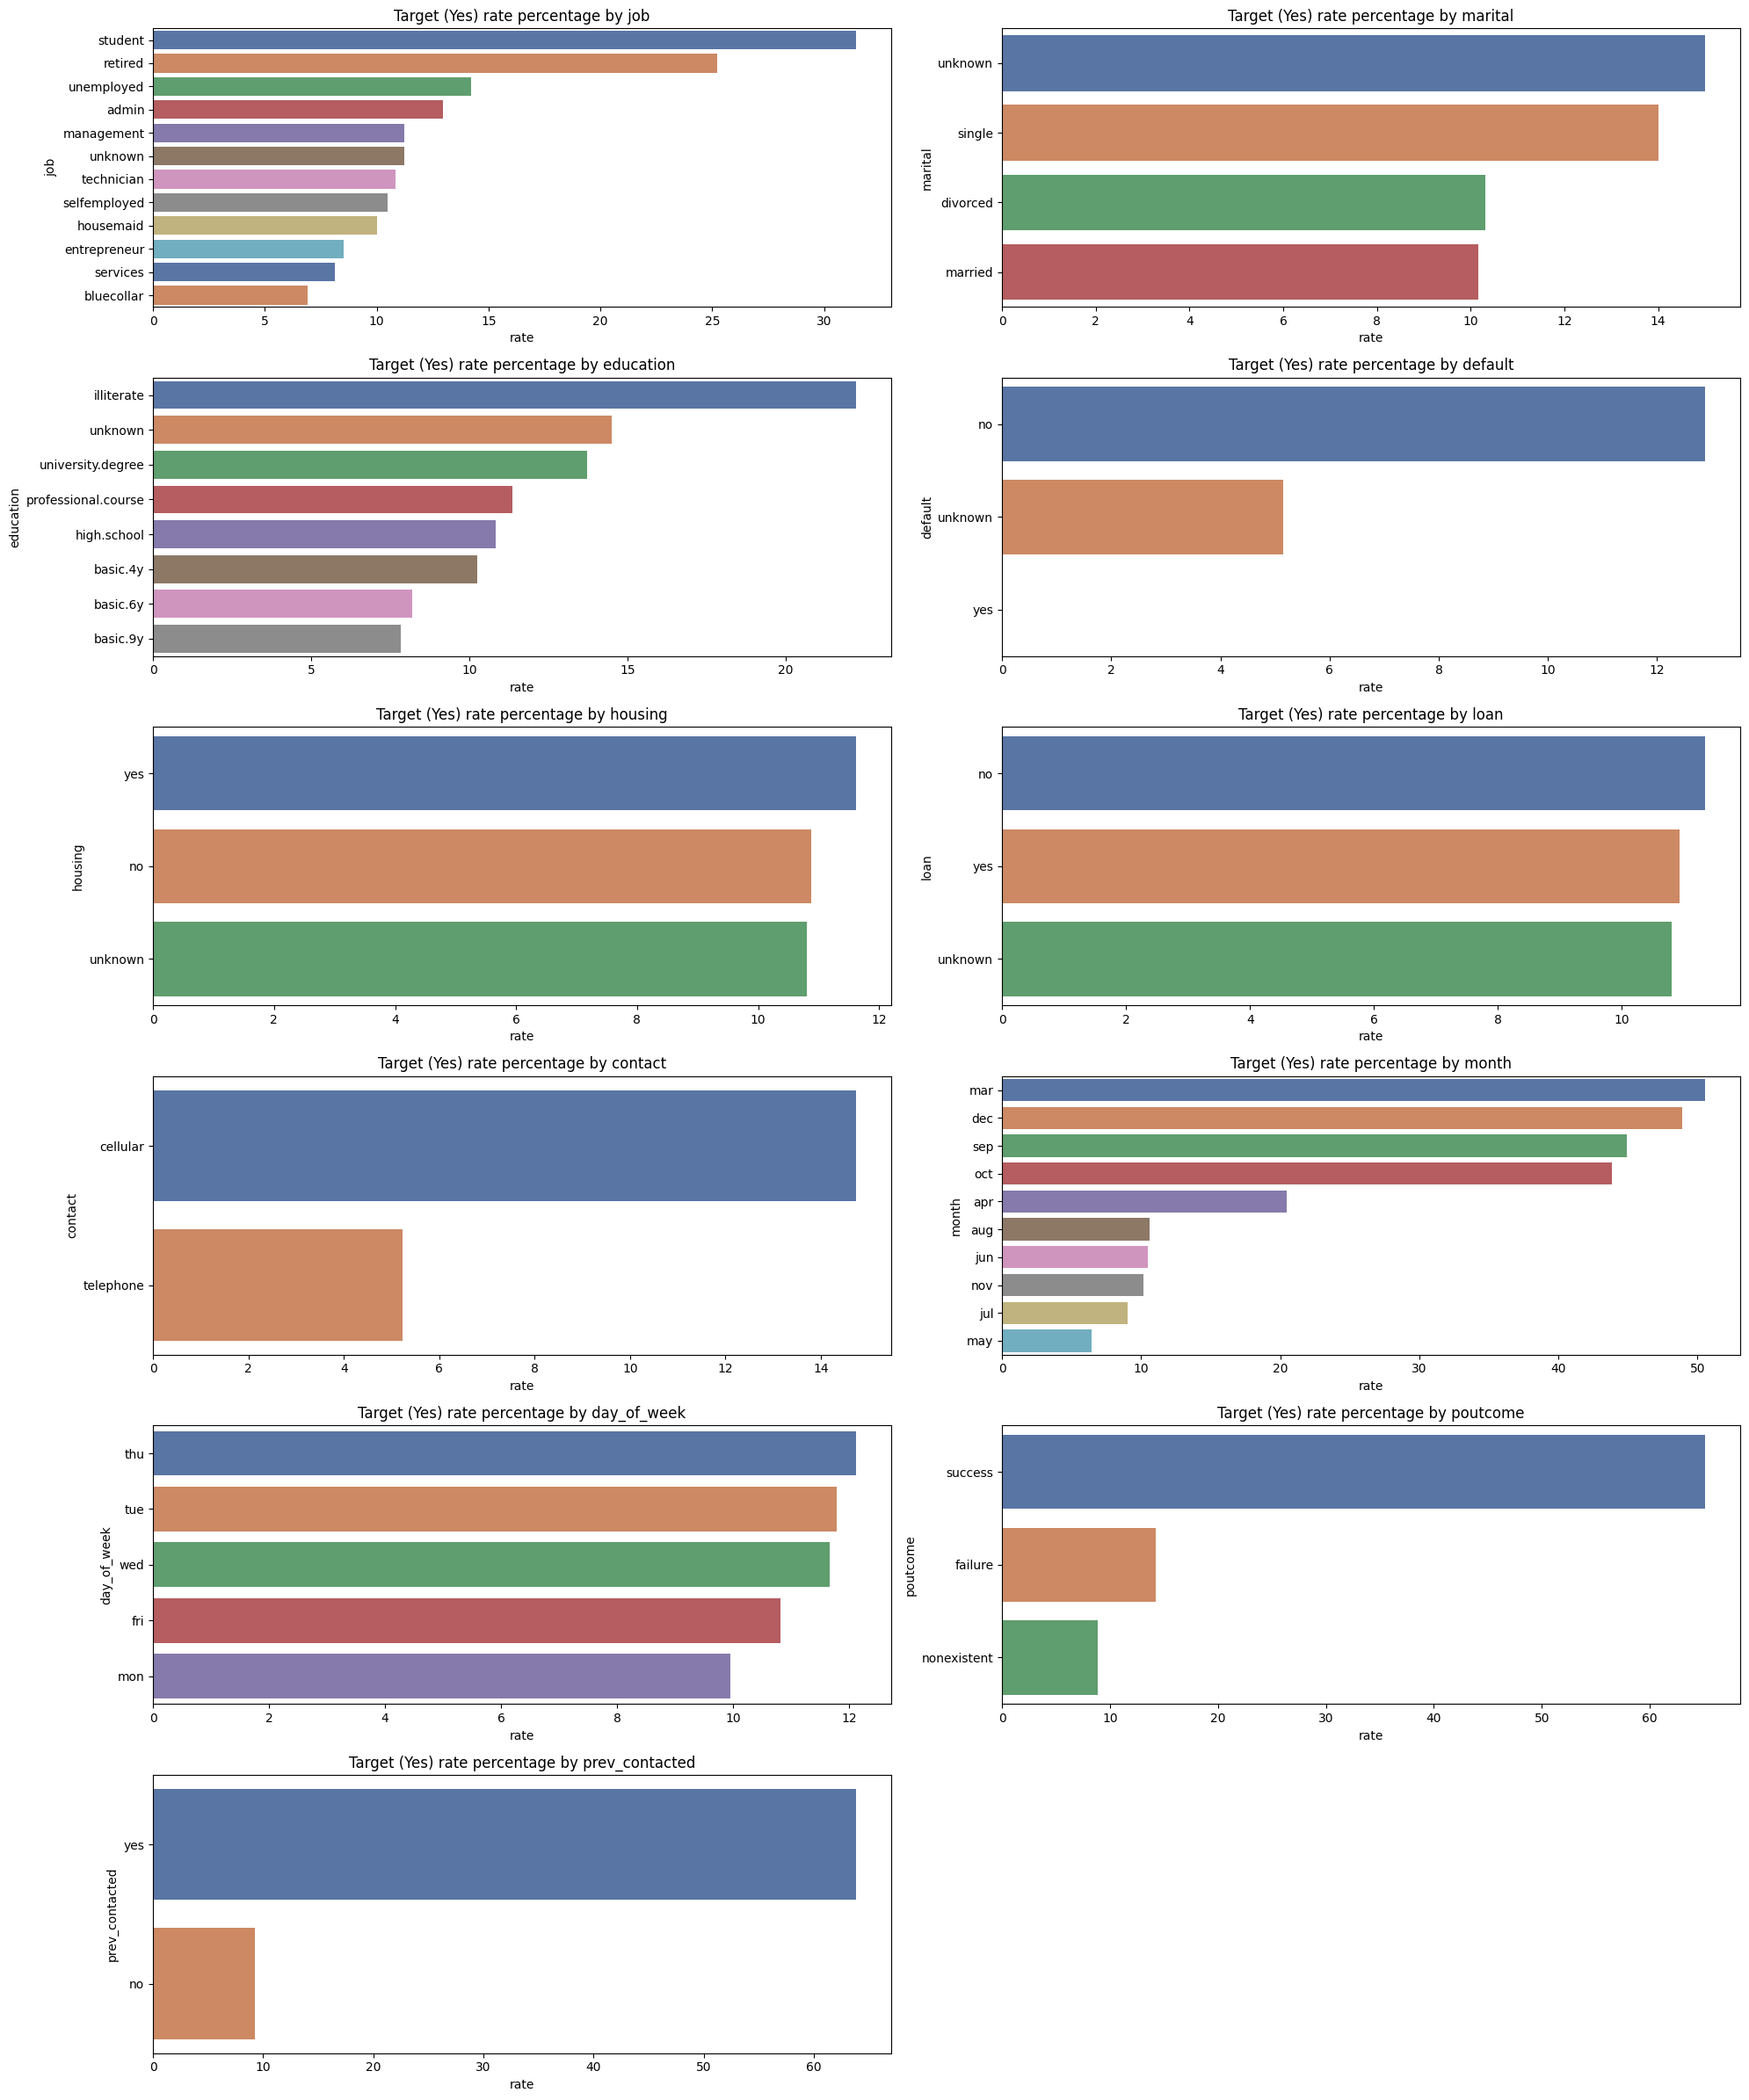

In [464]:
#EDA - Bivariate categories
def plot_target_rate_by_category(data, min_count=1):
    cat_cols = [c for c in df.select_dtypes(include=['object']).columns if c != "y"]

    n_cols = 2  # number of subplot columns
    n_rows = math.ceil(len(cat_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 10, n_rows * 4))
    axes = axes.flatten()
    # compute target rate per category (filter tiny groups for readability)
    for ax, col in zip(axes, cat_cols):
      grouped  = (data.groupby(col)["y"]
                .agg(count='size',
                      yes_count=lambda x: (x == "yes").sum()))
      grouped["rate"] = grouped["yes_count"] / grouped["count"] *100
      grouped = grouped.sort_values("rate", ascending=False)
      grouped = grouped.query("count >= @min_count")
      sns.barplot(x="rate", y=grouped.index, data=grouped, ax=ax, orient="h",palette="deep", hue =grouped.index)
      ax.set_title(f"Target (Yes) rate percentage by {col}", fontsize=12)
    # Hide any unused subplots
    for ax in axes[len(cat_cols):]:
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plot_target_rate_by_category(df)

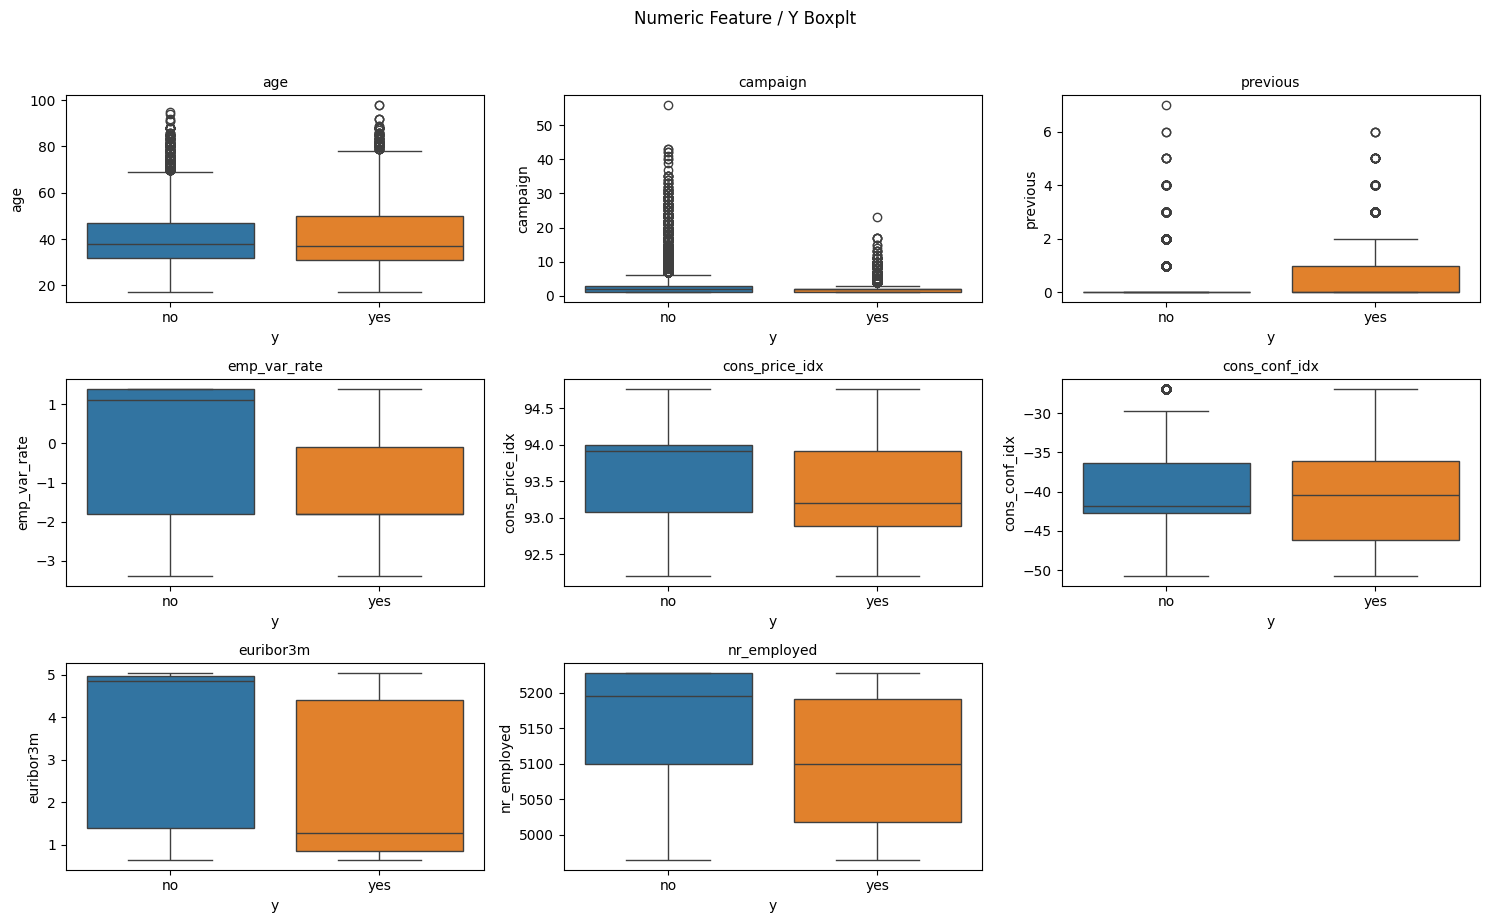

In [465]:
def plot_box_Y_all(df,palette="dark"):
    """
     Box plot for all numerical columns and Y in a DataFrame
    as small subplots in a grid layout.

    Args:
        df (DataFrame): Your dataset.
    """
    num_cols = df.select_dtypes(include=['number']).columns
    n_cols = 3  # number of subplot columns
    n_rows = math.ceil(len(num_cols)/n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        sns.boxplot(x="y", y=df[col], data=df,ax=ax,hue="y")
        ax.set_title(col, fontsize=10)

    # Hide any unused subplots
    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.suptitle("Numeric Feature / Y Boxplt", y=1.02)
    plt.tight_layout()
    plt.show()


plot_box_Y_all(df)


In [466]:
from scipy.stats import ttest_ind
yes = df.loc[df["y"]=="yes", "age"]
no  = df.loc[df["y"]=="no", "age"]
t, p = ttest_ind(yes, no, equal_var=False)
print("t-test:", t, "p-value:", p)

#Tests the null hypothesis:
#The means of the two groups are equal.
# How to Interpret

# p < 0.05 → reject null hypothesis → the difference between groups is statistically significant.

# p ≥ 0.05 → fail to reject null → no evidence of a difference in group means.

t-test: 4.779542781151716 p-value: 1.8047932698425662e-06


*p < 0.05 → reject null hypothesis Very strong evidence that age differs between yes and no.*

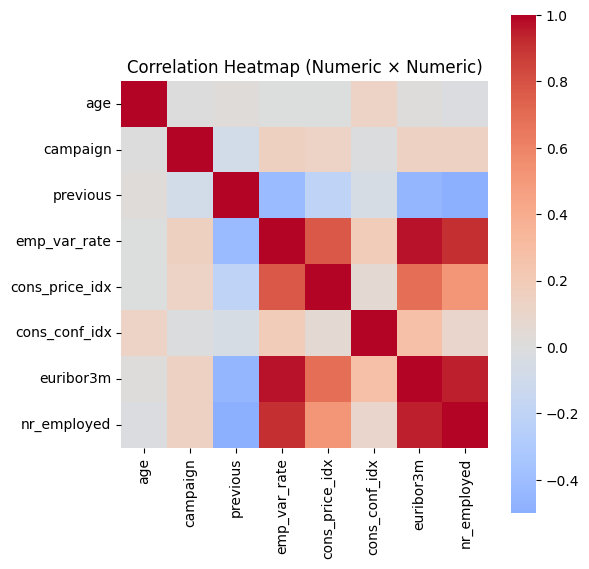

In [467]:
#EDA Multivariant

# ========== Plots ==========
def plot_corr_heatmap(df, annot=False):
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) < 2:
        return
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(min(12, 2+0.5*len(num_cols)), min(10, 2+0.5*len(num_cols))))
    sns.heatmap(corr, cmap="coolwarm", center=0, square=True, annot=annot, fmt=".2f")
    plt.title("Correlation Heatmap (Numeric × Numeric)")
    plt.tight_layout()
    plt.show()

plot_corr_heatmap(df)


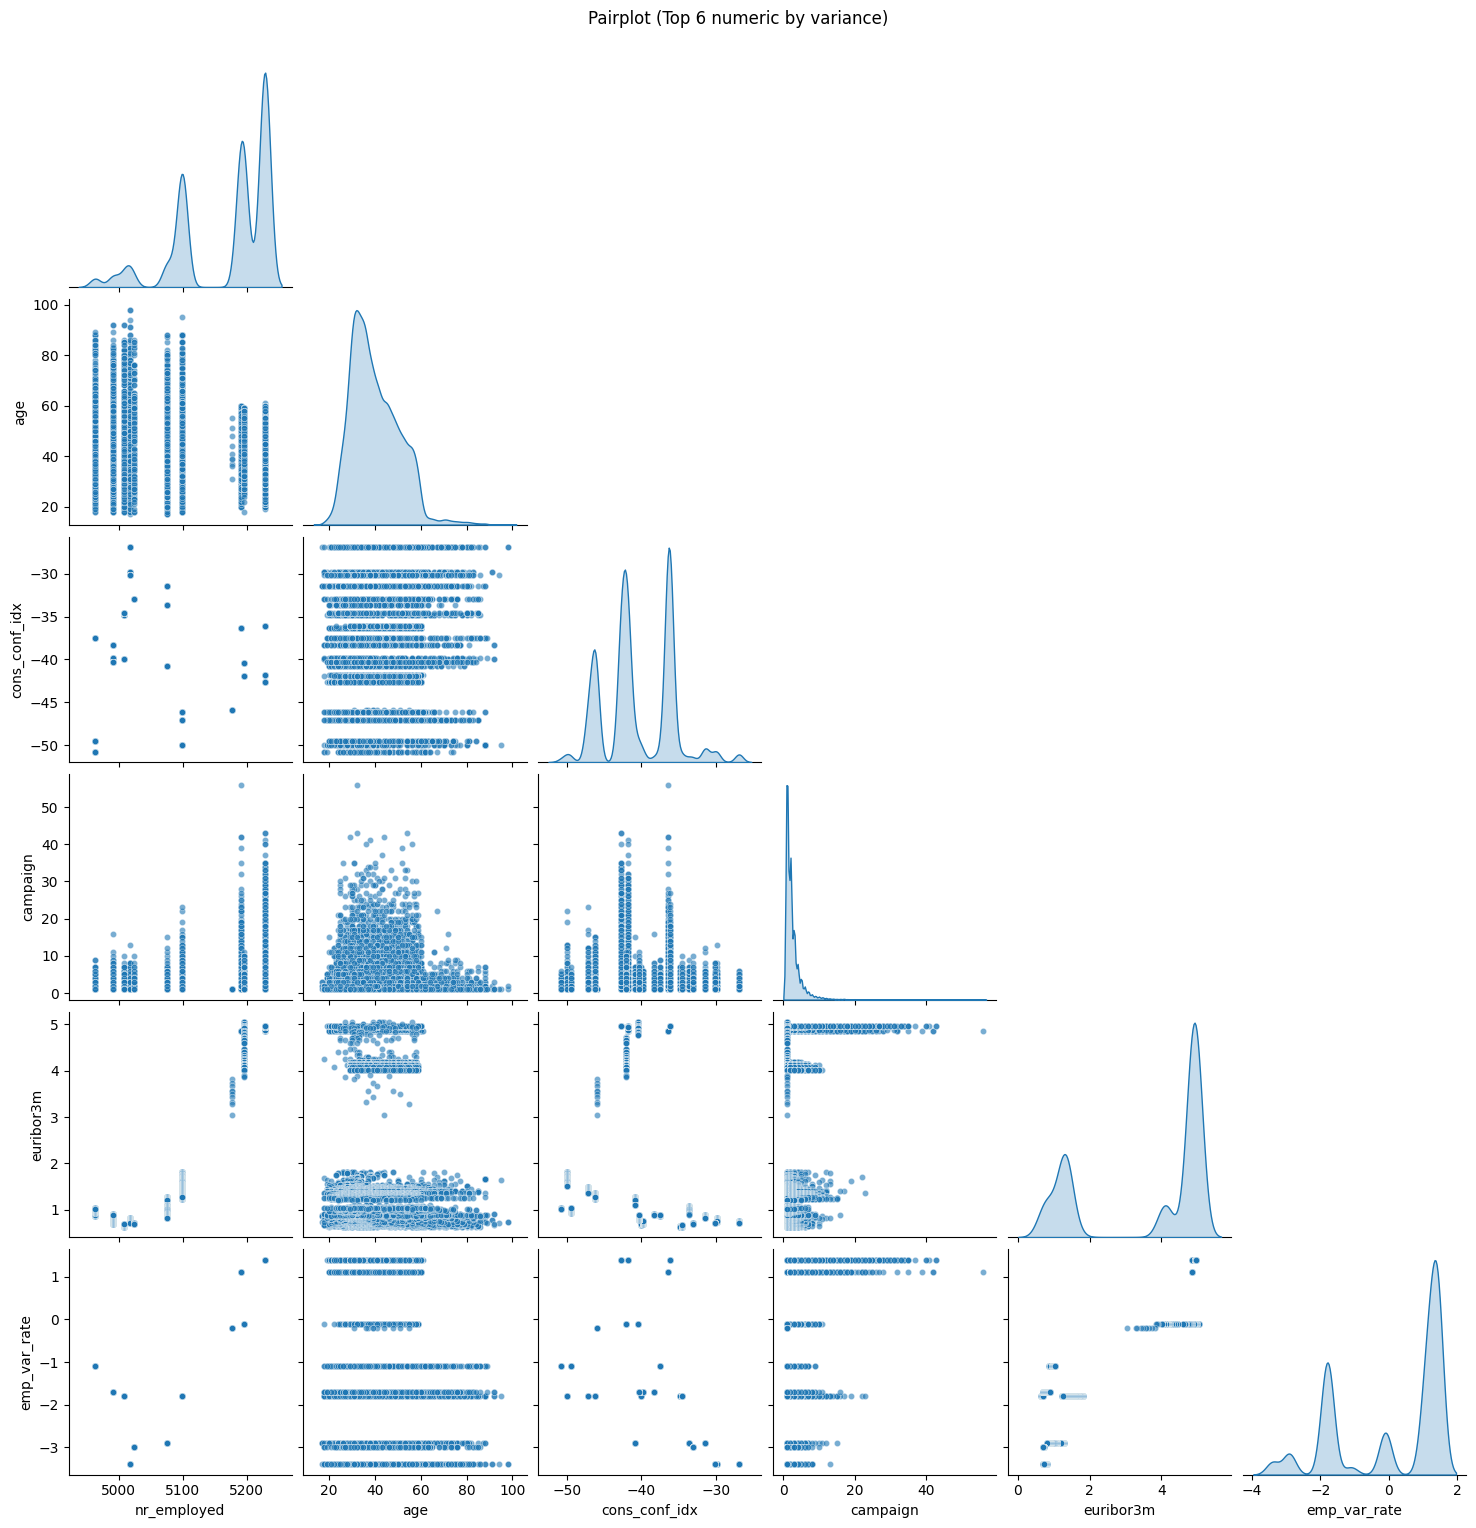

In [468]:
def _top_k_by_variance(df, cols, k=6):
    if not list(cols): # Check if the list of column names is empty
        return []
    var = df[cols].var(numeric_only=True).sort_values(ascending=False)
    return var.index.tolist()[:k]

def plot_pairplot(df, hue=None, k=6):
    num_cols = df.select_dtypes(include=['number']).columns
    top = _top_k_by_variance(df, num_cols, k=k)
    if len(top) >= 2:
        sns.pairplot(df[top], hue=hue, diag_kind="kde", corner=True, plot_kws={"alpha":0.6, "s":20})
        plt.suptitle(f"Pairplot (Top {len(top)} numeric by variance)", y=1.02)
        plt.show()

plot_pairplot(df)

In [469]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,prev_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


Text(0, 0.5, 'Count')

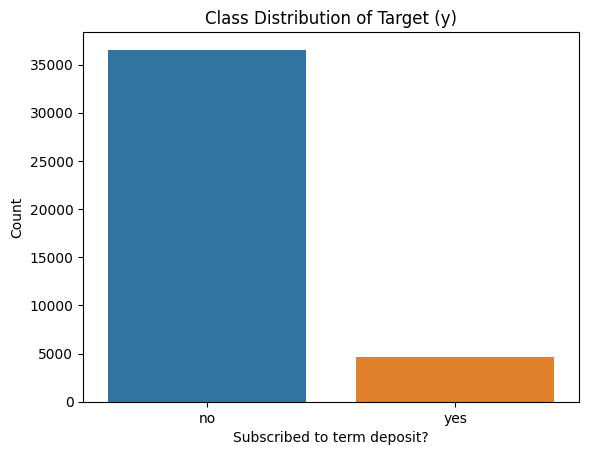

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x='y', hue='y' )
ax.set_title('Class Distribution of Target (y)')
ax.set_xlabel('Subscribed to term deposit?')
ax.set_ylabel('Count')

In [471]:
num_cols = df.select_dtypes(include=['number']).columns
y_numeric_corr = df[num_cols].corrwith(df['y'].map({'yes': 1, 'no': 0}).astype('int8')).sort_values(ascending=False)
print(y_numeric_corr.round(3))

previous          0.230
cons_conf_idx     0.055
age               0.030
campaign         -0.066
cons_price_idx   -0.136
emp_var_rate     -0.298
euribor3m        -0.308
nr_employed      -0.355
dtype: float64


Each number shows how correlated that feature is with the target y (0=“no”, 1=“yes”).

Positive values → higher feature values are linked to "yes".

Negative values → higher feature values are linked to "no".

Close to 0 → weak or no linear relationship.

## Target to coerce to binary numeric
## y: map 'yes'→1, 'no'→0 .

In [472]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}).astype('int8')
df['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [473]:
#df['prev_contacted'] = df['prev_contacted'].map({'yes': 1, 'no': 0}).astype('int8')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,prev_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,no


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

# **Busines Objective**:
The objective of this project is to improve the effectiveness of the bank’s direct marketing campaigns by predicting whether a client will subscribe to a term deposit, the article marntioned they data contain 17 campaigns information.

By analyzing client demographics, financial attributes, past campaign interactions, and economic indicators, the bank wants to:

*   Identify the most promising clients who are likely to subscribe,
*   Optimize marketing resources (reduce wasted calls and time),
*   Increase conversion rates for term deposits, and
*   Gain insights into which client and campaign factors most influence success.


## **Problem 5: Engineering Features**

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

## **Finding on Features based on the visual charts**
**Numerical:**
1. age : Right-skewed, most clients between 25–60, with outliers up to ~100. outlier >70 but may keep <90, maybe keep older clients’ signal as seems retired customer who say Yes are low amost 25% so amybe better keep 70 to 90.
 Distribution for yes and no is quite similar (both center ~38–40)
2. campaign:  
  *   Highly skewed. extreme outliers (values > 10).
  *   Median campaign is slightly higher for “no” (more calls → more rejection).
  *   Those who said “yes” usually had fewer contacts.

3. previous:
  *   Mostly 0, very skewed. may onvert to a binary indicator (prev_contacted = previous > 0).
  *   Clients who subscribed (“yes”) had higher previous values (more often contacted before).

4. emp_var_rate:
  *   Discrete values with clear peaks -3, -2, -1, 0, 1.
  *   lear difference:
   no -> higher employment variation rate (~1).
   yes -> lower, even negative values.

5. cons_price_idx: Clustered around specific values, looks more categorical.
    *    yes clients are slightly associated with lower price index (93.0–93.5) compared to no.
    *   Difference is modest but present.
6. cons_conf_idx:
    *   Distinct clusters/peaks.
    *  yes clients linked to lower consumer confidence (worse sentiment, ~–40 vs –45).
    *  Good separation.
7. euribor3m:WiStrong separation:

    *  no clients -> higher rates (~5).

    *  yes clients -> lower rates (~1).
8. nr_employed:
    *  highly correlated with emp_var_rate and euribor3m
    *  no → higher employment numbers (~5200).
    *  yes → lower (~5000).


**categorical:**

1. job

  *   Diverse categories, with admin, blue-collar, technician, services dominating.
  *   Some categories have very few samples (e.g., unknown).
  *   Decision: grouping rare jobs into "Other".

2. marital

  *   Mostly married, then single, fewer divorced.
  *   Decision: Drop unknown (very few).

3. education

  *   Spread across several categories, with university degree leading.
  *   Some categories very small (illiterate, unknown).
  *   Decision: Group rare levels.

4. default

  *   Majority no, with many unknown. Very few yes.
  *   Decision: Potentially drop, since too imbalanced and dominated by unknowns.

4. housing  
  *   Balanced between yes and no, few unknown.
  *   Decision: keep maybe combine with loan to make onw has_loan
5. loan
  *   Mostly no, some yes, some unknown.
  *   Decision: keep maybe combine with housing to make onw has_loan

6. month
  *   imbalance
  *   Decision: Keep, but instead of raw categorical, encode as seasonality
7. day_of_week
  *   very balanced and also in yes percentage almost same for all days
  *   Decision: Drop low impact
8. poutcome
   *   Mostly nonexistent (no previous campaign), few success/failure.
  *   Decision: based on barchart yes percetage is high when previous campaingn is high
9. prev_contacted
   *   Mostly no, some yes.
   *   Decision: Keep — useful binary predictor.



**the correlation heatmap:**

*    Observations


1. High correlations ( 0.9+)
    emp_var_rate, euribor3m, and nr_employed are very strongly correlated (red blocks). This means they carry the same economic signal (labor market + interest rates). we can use **PCA**
2. Moderate correlations

      emp_var_rate also moderately correlated with cons_price_idx and cons_conf_idx.
      That makes sense: all are macroeconomic indicators.

3. Low/near-zero correlations

      age, campaign, and previous are not correlated with the economic features they bring independent customer info.

**PairPlot**
Age Distribution is skewed (most clients between 30–60).

In [475]:
df_query = df[df['age'] <16]
df_query
# no age less than 16 no need to clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,prev_contacted


In [425]:
df_query = df[(df['job'] == 'retired') & (df['age'] > 70)]
print(len(df_query))
df_query = df[(df['job'] == 'retired') & (df['age'] > 70) & (df['y'] == 'yes')]
print(len(df_query))
print(len(df))

# Above 70 small fractiona and behave a bif different yes rate almost 50%  to avoid noise/outlier I can do group age we keep over 70 and cap undert 90

382
0
41188


In [426]:
bins = [0, 30, 50, 70, 120]   # ranges (0-30, 31-50, 51-70, 71+)
labels = ['<30', '30-50', '50-70', '70+']
df = df[df['age'] < 90]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Check distribution
print(df['age_group'].value_counts())
yes_rate_by_age = df.groupby("age_group")['y'].mean()

print(yes_rate_by_age)
df = df.drop(columns=['age'])


# Cap outlier in campaign to 10
df['campaign'] = np.where(df['campaign'] > 10, 10, df['campaign'])

#convert the previous column into a binary indicator like this:
df['previous'] = (df['previous'] > 0).astype('int8')

#grouping rare jobs into "Other".
job_counts = df['job'].value_counts()
df['job_grouped'] = df['job'].apply(lambda x: x if job_counts[x] >= 1720 else 'Other') # retired count 1720
job_grouped = df['job_grouped'].value_counts()
#job_grouped

df = df.drop(columns=['job'])

# droping Marital unknown ver few
df = df[df['marital'] != 'unknown']


education_counts = df['education'].value_counts()
edu_map = {
    'university.degree': 'Higher',
    'professional.course': 'Higher',
    'basic.4y': 'Basic',
    'basic.6y': 'Basic',
    'basic.9y': 'Basic',
    'high.school': 'High School',
    'illiterate': 'Other',
    'unknown': 'Other'
}

df['prev_contacted'] = df['prev_contacted'].map({'yes': 1, 'no': 0}).astype('int8')

df['education_grouped'] = df['education'].map(edu_map)
df = df.drop(columns=['education'])

# default Majority no, with many unknown. Very few yes. Drop
df = df.drop(columns=['default'])

# merge housing and loan to has previous loan
df['has_loan'] = ((df['housing'].str.lower() == 'yes') | (df['loan'].str.lower() == 'yes')).astype(int)
df = df.drop(columns=['housing'])
df = df.drop(columns=['loan'])

#day_of_week Fairly balanced across weekdays.and rate yes is same decied to drop
df = df.drop(columns=['day_of_week'])

age_group
30-50    26625
<30       7383
50-70     6758
70+        412
Name: count, dtype: int64
age_group
<30      0.152242
30-50    0.091418
50-70    0.130216
70+      0.478155
Name: y, dtype: float64


/tmp/ipython-input-2711594074.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yes_rate_by_age = df.groupby("age_group")['y'].mean()


In [427]:
MONTHS = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
MONTH_TO_NUM = {m:i+1 for i,m in enumerate(MONTHS)}

# ---- 1) Ordinal month number (useful for trees; not for linear models)
df['month_num'] = df['month'].map(MONTH_TO_NUM).astype('Int64')

# ---- 2) Quarter buckets (Q1–Q4)
def month_to_quarter(m):
    n = MONTH_TO_NUM.get(m, np.nan)
    return f"Q{((n-1)//3)+1}" if pd.notna(n) else np.nan

df['month_quarter'] = df['month'].map(month_to_quarter)
df = df.drop(columns=['month'])
df = df.drop(columns=['month_num'])

In [428]:
df.head()

,marital,contact,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,prev_contacted,age_group,job_grouped,education_grouped,has_loan,month_quarter
0,married,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,50-70,Other,Basic,0,Q2
1,married,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,50-70,services,High School,0,Q2
2,married,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,30-50,services,High School,1,Q2
3,married,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,30-50,admin,Basic,0,Q2
4,married,telephone,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,50-70,services,High School,1,Q2


PCA is a very good way to handle this multicollinearity issue emp_var_rate, euribor3m, nr_employed are highly correlated (almost collinear).
In linear/logistic regression, SVM, neural nets → multicollinearity causes:

*   Unstable coefficients,
*   Inflated variance,
*   Difficult interpretation.

In [429]:
# Will add PCA to the to pipe line for logistic regression, SVM
# pipe = Pipeline([
#     ("scaler", StandardScaler()),
#     ("pca", PCA(n_components=0.95, random_state=0)),  # keep enough PCs to explain 95% variance
#     ("logreg", LogisticRegression(max_iter=1000))
# ])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41098 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   marital            41098 non-null  object  
 1   contact            41098 non-null  object  
 2   campaign           41098 non-null  int64   
 3   previous           41098 non-null  int8    
 4   poutcome           41098 non-null  object  
 5   emp_var_rate       41098 non-null  float64 
 6   cons_price_idx     41098 non-null  float64 
 7   cons_conf_idx      41098 non-null  float64 
 8   euribor3m          41098 non-null  float64 
 9   nr_employed        41098 non-null  float64 
 10  y                  41098 non-null  int8    
 11  prev_contacted     41098 non-null  int8    
 12  age_group          41098 non-null  category
 13  job_grouped        41098 non-null  object  
 14  education_grouped  41098 non-null  object  
 15  has_loan           41098 non-null  int64   
 16  month_qua

In [430]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols.drop('y')
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(num_cols)
print(cat_cols)

Index(['campaign', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'prev_contacted',
       'has_loan'],
      dtype='object')
Index(['marital', 'contact', 'poutcome', 'age_group', 'job_grouped',
       'education_grouped', 'month_quarter'],
      dtype='object')


In [477]:
base_features =list(num_cols) + list(cat_cols)

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Base features:", base_features)

Numerical columns: Index(['age', 'campaign', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')
Categorical columns: Index(['marital', 'contact', 'poutcome', 'age_group', 'job_grouped',
       'education_grouped', 'month_quarter'],
      dtype='object')
Base features: ['age', 'campaign', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'marital', 'contact', 'poutcome', 'age_group', 'job_grouped', 'education_grouped', 'month_quarter']


In [432]:
df[base_features]

,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,prev_contacted,has_loan,marital,contact,poutcome,age_group,job_grouped,education_grouped,month_quarter
0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,married,telephone,nonexistent,50-70,Other,Basic,Q2
1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,married,telephone,nonexistent,50-70,services,High School,Q2
2,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,married,telephone,nonexistent,30-50,services,High School,Q2
3,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,married,telephone,nonexistent,30-50,admin,Basic,Q2
4,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,married,telephone,nonexistent,50-70,services,High School,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,married,cellular,nonexistent,70+,Other,Higher,Q4
41184,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,married,cellular,nonexistent,30-50,bluecollar,Higher,Q4
41185,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,married,cellular,nonexistent,50-70,Other,Higher,Q4
41186,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,married,cellular,nonexistent,30-50,technician,Higher,Q4


In [433]:
def conv_rate_by(col):
    out = (df.groupby(col, observed=True)['y']
             .agg(conv_rate='mean',size='size')
             .sort_values('conv_rate', ascending=False))
    return out

if 'y' in cat_cols:
    cat_cols.remove('y')

for c in cat_cols:
    print(f"\n=== {c} ===")
    print(conv_rate_by(c).round({'conv_rate': 3}))


=== marital ===
          conv_rate   size
marital                   
single        0.140  11568
divorced      0.103   4610
married       0.101  24920

=== contact ===
           conv_rate   size
contact                    
cellular       0.147  26081
telephone      0.052  15017

=== poutcome ===
             conv_rate   size
poutcome                     
success          0.651   1364
failure          0.142   4236
nonexistent      0.088  35498

=== age_group ===
           conv_rate   size
age_group                  
70+            0.478    412
<30            0.152   7370
50-70          0.130   6741
30-50          0.091  26575

=== job_grouped ===
             conv_rate   size
job_grouped                  
Other            0.161   7835
admin            0.130  10408
management       0.112   2921
technician       0.108   6731
services         0.082   3963
bluecollar       0.069   9240

=== education_grouped ===
                   conv_rate   size
education_grouped                  
Othe

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [434]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score, precision_recall_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import time

In [435]:
X = df[base_features].copy()
y = df['y'].values



In [436]:
# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [437]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_train = dummy.predict(X_train)

y_pred_test = dummy.predict(X_test)
y_prob = getattr(dummy, "predict_proba", lambda X: None)(X_test)
y_score = y_prob[:,1] if y_prob is not None else y_pred_test  # fall back if needed

baseline = {
    "accuracy train": accuracy_score(y_train, y_pred_train),
    "accuracy test": accuracy_score(y_test, y_pred_test),
    "roc_auc": roc_auc_score(y_test, y_score) if y_prob is not None else 0.5,
    "f1_positive": f1_score(y_test, y_pred_test, pos_label=1),
    "pr_auc": average_precision_score(y_test, y_score)
}
print(f"Baseline:")
for key, value in baseline.items():
    print(f"{key}: {value}")

Baseline:
accuracy train: 0.8875235719934302
accuracy test: 0.8874695863746959
roc_auc: 0.5
f1_positive: 0.0
pr_auc: 0.11253041362530414


In [438]:
# Aim to beat the majority-class baseline from your training set.

# If always predict the most frequent class (likely “no”),
# baseline accuracy = share of that class.
# (e.g., if positives = 11%, negatives = 89%, baseline accuracy ≈ 0.89.)

# On imbalanced data, also report:

# ROC-AUC ≈ 0.50 for a non-informative baseline.

# F1 (for the positive class) = 0 if you always predict “no”.

# PR-AUC = positive rate (e.g., 0.11).

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [439]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols),
    ],
    remainder='drop'
)

In [440]:
from sklearn.decomposition import PCA
logisticRegr = Pipeline([
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced'))
])

print(logisticRegr)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  Index(['campaign', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'prev_contacted',
       'has_loan'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['marital', 'contact', 'poutcome', 'age_group', 'job_grouped',
       'education_grouped', 'month_quarter'],
      dtype='object'))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])


### Problem 9: Score the Model

What is the accuracy of your model?

In [441]:
from time import time
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, average_precision_score

# Fit (done once)
start_real = time()
logisticRegr.fit(X_train, y_train)
end_real = time()

# Inference
proba = logisticRegr.predict_proba(X_test)[:, 1]     # probabilities for class 1
y_pred_test = (proba >= 0.5).astype(int)             # thresholded labels at 0.5


# Train predictions (for train accuracy)
y_pred_train = logisticRegr.predict(X_train)

metrics_logistic = {
    "accuracy train": accuracy_score(y_train, y_pred_train),
    "accuracy test": accuracy_score(y_test, y_pred_test),
    "roc_auc": roc_auc_score(y_test, proba),                    # use probs
    "f1_positive": f1_score(y_test, y_pred_test, pos_label=1),
    "pr_auc": average_precision_score(y_test, proba),           # use probs
    "time_inference_sec": end_real - start_real
}

print(f"Logistic Regression:")
for key, value in metrics_logistic.items():
    print(f"{key}: {value}")

Logistic Regression:
accuracy train: 0.8092341383295821
accuracy test: 0.8104622871046229
roc_auc: 0.7896102106218623
f1_positive: 0.4375451263537906
pr_auc: 0.4491645267848371
time_inference_sec: 49.91781949996948


In [442]:

def get_ct_feature_names(ct: ColumnTransformer, X):
    """Return output feature names from a *fitted* ColumnTransformer."""
    out = []

    for name, trans, cols in ct.transformers_:
        if name == "remainder":
            if ct.remainder == "passthrough":
                # passthrough any remaining columns
                used = set(np.concatenate([
                    np.atleast_1d(c if isinstance(c, (list, np.ndarray)) else [c])
                    for _, _, c in ct.transformers_ if _ != "remainder"
                ], dtype=object).flat)
                out += [c for c in X.columns if c not in used]
            continue

        # resolve input feature names
        if isinstance(cols, slice):
            in_feats = list(X.columns[cols])
        elif callable(cols):
            in_feats = list(cols(X))
        else:
            in_feats = list(cols)

        # unwrap pipeline to final step
        final = trans.steps[-1][1] if hasattr(trans, "steps") else trans

        # expand names if transformer supports it (e.g., OneHotEncoder)
        if hasattr(final, "get_feature_names_out"):
            try:
                names = final.get_feature_names_out(in_feats)
            except TypeError:
                names = final.get_feature_names_out()
            out += list(names)
        else:
            out += in_feats

    return np.array(out)

coefs = logisticRegr.named_steps["clf"].coef_.ravel()
prep = logisticRegr.named_steps["prep"]  # ColumnTransformer
feature_names = get_ct_feature_names(prep, X_train)

logit_importance = pd.DataFrame({
    "feature": feature_names,
    "importance": np.abs(coefs)  # magnitude for importance
}).sort_values("importance", ascending=False)

TOP_N = 30
print("\nTop features (by |coef|):")
print(logit_importance.head(TOP_N).to_string(index=False))


Top features (by |coef|):
                      feature  importance
                 emp_var_rate    1.584100
             month_quarter_Q4    1.523706
                    euribor3m    1.390182
             month_quarter_Q2    1.363378
                  nr_employed    0.834115
             month_quarter_Q3    0.772944
             poutcome_success    0.739794
            contact_telephone    0.550660
                age_group_70+    0.441395
               cons_price_idx    0.354817
                age_group_<30    0.230109
               prev_contacted    0.212883
       job_grouped_bluecollar    0.197594
                     previous    0.177836
         job_grouped_services    0.166620
              age_group_50-70    0.166039
      education_grouped_Other    0.138520
       job_grouped_management    0.125899
     education_grouped_Higher    0.122312
       job_grouped_technician    0.093119
               marital_single    0.089785
            job_grouped_admin    0.081088
       

### **Dummy Classifier (predicts majority class or random)**

*   Accuracy train/test ≈ 88.7% (same as majority “no” rate).

*   ROC-AUC = 0.5 Random guess.

*   F1 = 0.0 ->never predicts positive.

*   PR-AUC ≈ 0.11 -> equal to positive class prevalence.

**⚠️This shows what happens if you don't learn anything always predict no.**

### **Logistic Regression (baseline model)**

*   ROC-AUC = 0.79 -> strong improvement, the model is actually ranking positives higher.

*   PR-AUC = 0.45 -> way above the 0.11 baseline someans model is capturing meaningful signal.

*   F1(0.5) = 0.439 -> good balance between precision and recall.

*   Training time = 0.04 sec -> fast and efficient.

✅**Logistic Regression is clearly learning patterns that separate “yes” vs. “no”, even though the dataset is imbalanced.**

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [443]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=False)  # default is RBF kernel
}

In [444]:
results = []
for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocess),
        ('clf', model)
    ])
    start_real = time()
    pipe.fit(X_train, y_train)
    end_real = time()

    train_acc = pipe.score(X_train, y_train)
    test_acc  = pipe.score(X_test, y_test)
    train_time = end_real - start_real

    results.append({
        "Model": name,
        "Train Time (s)": round(train_time, 4),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression         46.3963          0.8092         0.8105
1                  KNN          0.1176          0.9124         0.8942
2        Decision Tree          0.2164          0.9714         0.8634
3                  SVM         11.4369          0.8875         0.8875


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [445]:
# PCA to decide to drop ["emp_var_rate", "euribor3m", "nr_employed"]
# from sklearn.decomposition import PCA

# # Suppose your dataframe is called df
# cols = ["emp_var_rate", "euribor3m", "nr_employed"]

# # 1) Standardize (important for PCA)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df[cols])

# # 2) Apply PCA
# pca = PCA()
# pcs = pca.fit_transform(X_scaled)

# # 3) Create a DataFrame of principal components
# df_pca = pd.DataFrame(
#     pcs, columns=[f"PC{i+1}" for i in range(len(cols))],
#     index=df.index
# )

# # 4) Explained variance
# print("Explained variance ratio:", pca.explained_variance_ratio_)
# print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())

# df["macro_PC1"] = df_pca["PC1"]
# df = df.drop(columns=cols)

# also based on coed in linierRegression  model following has low impact Decided to drop
#                     campaign    0.061164
#                 cons_conf_idx    0.043131

# List of weak features to drop
drop_features = [
    "campaign",
    "cons_conf_idx",
]

# Keep only useful features
X = df.drop(columns=drop_features + ["y"])   # drop weak + target
y = df["y"]



In [380]:
#appled pCA but model had issue so revert


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41098 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   marital            41098 non-null  object  
 1   contact            41098 non-null  object  
 2   campaign           41098 non-null  int64   
 3   previous           41098 non-null  int8    
 4   poutcome           41098 non-null  object  
 5   cons_price_idx     41098 non-null  float64 
 6   cons_conf_idx      41098 non-null  float64 
 7   y                  41098 non-null  int8    
 8   prev_contacted     41098 non-null  int8    
 9   age_group          41098 non-null  category
 10  job_grouped        41098 non-null  object  
 11  education_grouped  41098 non-null  object  
 12  has_loan           41098 non-null  int64   
 13  month_quarter      41098 non-null  object  
 14  macro_PC1          41098 non-null  float64 
dtypes: category(1), float64(3), int64(2), int8(3), object(6)
m

In [446]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols.drop('y')
cat_cols = df.select_dtypes(include=['object', 'category']).columns
base_features =list(num_cols) + list(cat_cols)
X = df[base_features].copy()
y = df['y'].values
# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols),
    ],
    remainder='drop'
)

Index(['campaign', 'previous', 'cons_price_idx', 'cons_conf_idx',
       'prev_contacted', 'has_loan', 'macro_PC1'],
      dtype='object')

In [447]:
pipelines = {
    "Logistic Regression": Pipeline([
        ('prep', preprocess),
        ('lr', LogisticRegression(max_iter=2000, class_weight='balanced'))
    ]),
    "KNN": Pipeline([
        ('prep', preprocess),
        ('knn', KNeighborsClassifier())
    ]),
    "Decision Tree": Pipeline([
        ('prep', preprocess),
        ('dt', DecisionTreeClassifier(random_state=42))
    ]),
    "SVM": Pipeline([
        ('prep', preprocess),
        ('clf', SVC(probability=False))  # probability for ROC/PR-AUC
    ])
}

In [448]:
param_grids = {
    "Logistic Regression": {
        'lr__C': [0.1, 1, 10, 12],
        'lr__penalty': ['l2'],
        'lr__solver': ['lbfgs']  # safe with ohe+scaling
    },
    "KNN": {
        'knn__n_neighbors': [3, 5, 7, 11,],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    "Decision Tree": {
        'dt__max_depth': [3, 5, 10, None],
        'dt__min_samples_split': [2, 5, 10],
        'dt__min_samples_leaf': [1, 2, 5],
        'dt__criterion': ['gini', 'entropy']
    },
    "SVM": {
        'clf__C': [0.5, 1, 5, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']  # only used when kernel='rbf'
    }
}



In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
def get_scores(estimator, X):
    """Return continuous scores for ROC/PR metrics.
    Prefer predict_proba[:,1], else decision_function; fallback to predict (labels)."""
    if hasattr(estimator, "predict_proba"):
        return estimator.predict_proba(X)[:, 1]
    if hasattr(estimator, "decision_function"):
        return estimator.decision_function(X)
    # Fallback (not ideal for ROC/PR, but keeps loop robust)
    return estimator.predict(X)

rows = []
roc_curves = {}
for name, pipe in pipelines.items():
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids.get(name, {}),  # safe get
        scoring="roc_auc",
        cv=5,
        n_jobs=-1,
        refit=True
    )

    t0 = time()
    grid.fit(X_train, y_train)
    t1 = time()

    best_model = grid.best_estimator_

    # Continuous scores (for ROC/PR)
    score_tr = get_scores(best_model, X_train)
    score_te = get_scores(best_model, X_test)

    # Hard labels (for Accuracy/F1)
    pred_tr = best_model.predict(X_train)
    pred_te = best_model.predict(X_test)

  # ROC curve data
    fpr, tpr, _ = roc_curve(y_test, score_te)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)

    rows.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Train Time (s)": round(t1 - t0, 3),
        "CV ROC-AUC (best)": round(grid.best_score_, 4),
        "Train Accuracy": round(accuracy_score(y_train, pred_tr), 4),
        "Test Accuracy": round(accuracy_score(y_test, pred_te), 4),
        "Test ROC-AUC": round(roc_auc_score(y_test, score_te), 4),          #
        "Test PR-AUC": round(average_precision_score(y_test, score_te), 4), #
        "Test F1@0.5": round(f1_score(y_test, pred_te), 4),
    })

results_df = pd.DataFrame(rows).sort_values("Test ROC-AUC", ascending=False).reset_index(drop=True)
print(results_df)

                 Model  \
0  Logistic Regression   
1        Decision Tree   
2                  SVM   
3                  KNN   

                                                                                               Best Params  \
0                                                {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}   
1  {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}   
2                                           {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}   
3                          {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}   

   Train Time (s)  CV ROC-AUC (best)  Train Accuracy  Test Accuracy  \
0          69.435             0.7868          0.8097         0.8106   
1           9.373             0.7823          0.9018         0.9024   
2         250.830             0.7705          0.8940         0.8974   
3          37.199             0.75

##### Questions

In [ ]:
pd.set_option("display.max_colwidth", None)  # don’t truncate strings
print(results_df)

                 Model  \
0  Logistic Regression   
1        Decision Tree   
2                  SVM   
3                  KNN   

                                                                                               Best Params  \
0                                                {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}   
1  {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}   
2                                           {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}   
3                          {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}   

   Train Time (s)  CV ROC-AUC (best)  Train Accuracy  Test Accuracy  \
0          69.435             0.7868          0.8097         0.8106   
1           9.373             0.7823          0.9018         0.9024   
2         250.830             0.7705          0.8940         0.8974   
3          37.199             0.75

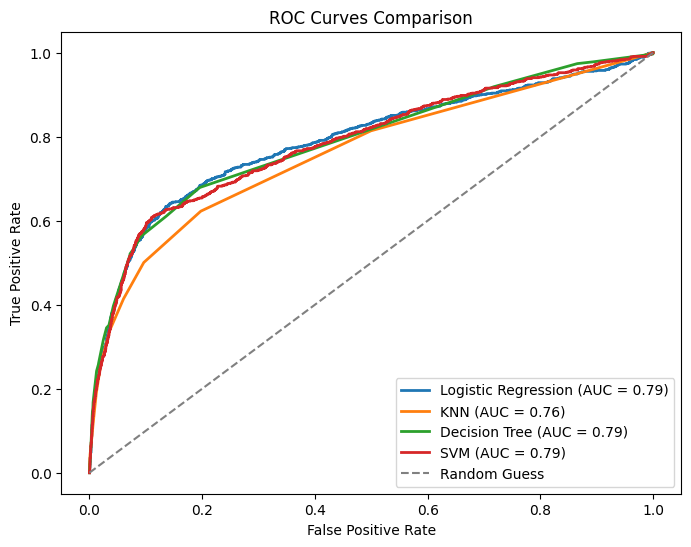

In [450]:
results_df = pd.DataFrame(rows).sort_values("Test ROC-AUC", ascending=False).reset_index(drop=True)
print(results_df)

# --- Plot ROC curves ---
plt.figure(figsize=(8,6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.show()
